In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.style as style
from matplotlib.gridspec import GridSpec

In [2]:
df_ChyS1 = pd.read_csv("csv_files/forAnalysis230814/*_K238A_25C_*0mV_ChyS1*_MeanClusterValues_filtered.csv", sep = ",")
df_ChyS2 = pd.read_csv("csv_files/forAnalysis230814/*_K238A_25C_*0mV_ChyS2*_MeanClusterValues_filtered.csv", sep = ",")
display(df_ChyS2)

#selection key
key_sel = "voltage [mV]"

# select cluster numbers: 
nr_clust_ChyS1 = {
    '100': 0,
    '120': 0,
    '140': 3,
    '160': 1,
    '180': 0,
    '200': 6,
}

nr_clust_ChyS2 = {
    '100': 2,
    '120': 0,
    '140': 0,
    '160': 0,
    '180': 4,
    '200': 0,
}

,voltage [mV],cluster_nr,cluster_ID,nr_events,mean_current[pA],mean_log_dwt,mean_skewness,mean_kurtosis,mean_rel_std[pA],std_current[pA],std_log_dwt,std_skewness,std_kurtosis,std_rel_std[pA],Sel_min_percentage[%],Sel_max_stdI[pA]
0,100,0,76.342320,32890,65.218624,-0.371737,11.313700,0.402017,-0.220283,8.397474,0.324637,4.741732,0.809651,1.219945,10.0,8
1,100,1,61.032098,33383,50.975123,-0.074010,7.119504,-0.029556,3.041037,9.115209,0.549064,2.028550,1.571370,3.064066,10.0,8
2,100,2,59.958632,68249,52.721652,-0.110329,3.971076,-0.980554,4.356787,3.067660,0.389972,1.067937,1.286987,4.364896,10.0,8
3,120,0,59.589095,21828,54.581405,-0.304512,3.873679,-1.099219,2.537742,2.836790,0.342813,1.115573,0.807901,2.372163,10.0,8
4,120,1,80.503888,8247,68.836084,-0.554790,13.069374,0.143543,-0.990322,8.220615,0.241166,6.145472,0.579816,0.660253,10.0,8
5,120,2,73.987142,7468,60.399235,-0.179285,10.559712,1.200023,2.007456,4.219724,0.237168,1.939335,0.871254,1.984509,10.0,8
6,120,3,72.980145,8055,59.214672,0.024372,5.512933,-0.550770,8.778938,9.540768,0.476116,1.947182,2.270371,5.629167,10.0,8
7,120,4,53.910856,7515,46.210734,-0.041510,7.673979,-0.722972,0.790624,5.784508,0.732841,2.682174,0.778247,1.572367,10.0,8
8,140,0,61.167043,5862,55.829611,-0.435201,4.318257,-0.989744,2.444120,2.945525,0.306222,1.565502,1.051568,2.593732,10.0,8
9,140,1,81.658938,3108,67.847220,-0.462972,14.526039,0.462596,-0.713945,7.155772,0.247938,4.472476,0.621342,0.905099,10.0,8


In [3]:
#Extract selected clusters for ChyS1
S1_nr = []
for n, key in enumerate(np.unique(df_ChyS1[key_sel])):
    data = df_ChyS1.loc[df_ChyS1[key_sel] == key]
    data = data.loc[data["cluster_nr"] == nr_clust_ChyS1[str(key)]]
    S1_nr.append(data.index[0])
S1 = pd.DataFrame(df_ChyS1, index = S1_nr)


#Extract selected clusters for ChyS2
S2_nr = []
for n, key in enumerate(np.unique(df_ChyS2[key_sel])):
    data = df_ChyS2.loc[df_ChyS2[key_sel] == key]
    data = data.loc[data["cluster_nr"] == nr_clust_ChyS2[str(key)]]
    S2_nr.append(data.index[0])
S2 = pd.DataFrame(df_ChyS2, index = S2_nr)

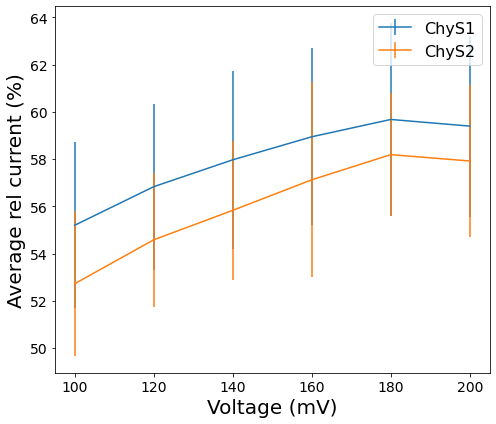

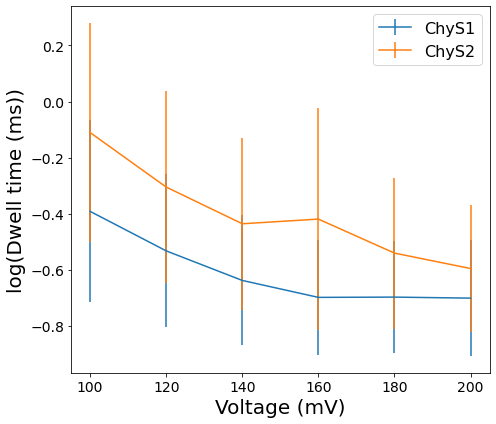

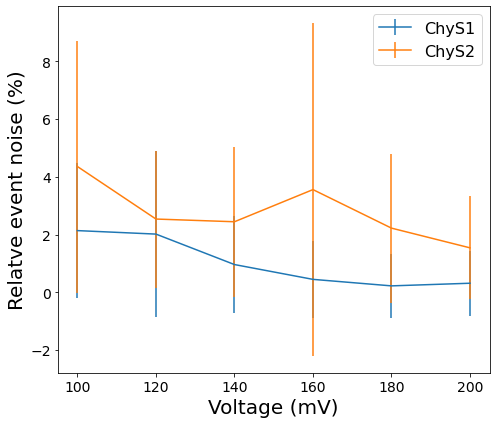

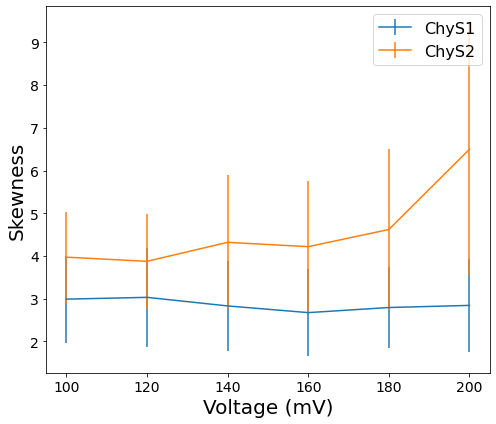

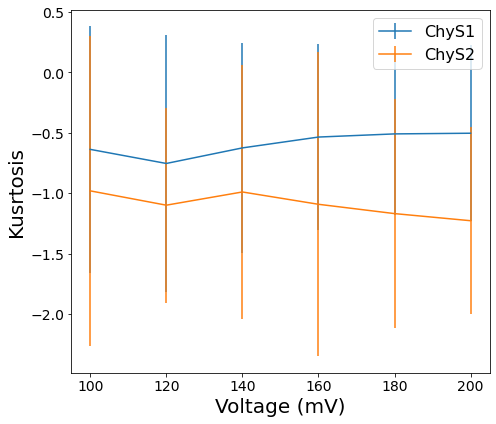

In [4]:
fsz = 20
#plot current
plt.figure(figsize = (7,6))
plt.errorbar(S1["voltage [mV]"], S1["mean_current[pA]"], S1["std_current[pA]"], label = "ChyS1")
plt.errorbar(S2["voltage [mV]"], S2["mean_current[pA]"], S2["std_current[pA]"], label = "ChyS2")
plt.ylabel('Average rel current (%)', fontsize = fsz)
plt.xlabel('Voltage (mV)', fontsize = fsz)
plt.legend(loc = 'best', fontsize = 0.8*fsz)
plt.yticks(fontsize = 0.7*fsz)
plt.xticks(fontsize = 0.7*fsz)
plt.tight_layout()
plt.savefig("csv_files/forAnalysis230814/ChyS12_current.png", dpi=300)
plt.show()

#plot dwell time
plt.figure(figsize = (7,6))
plt.errorbar(S1["voltage [mV]"], S1["mean_log_dwt"], S1["std_log_dwt"], label = "ChyS1")
plt.errorbar(S2["voltage [mV]"], S2["mean_log_dwt"], S2["std_log_dwt"], label = "ChyS2")
plt.ylabel('log(Dwell time (ms))', fontsize = fsz)
plt.xlabel('Voltage (mV)', fontsize = fsz)
plt.legend(loc = 'best', fontsize = 0.8*fsz)
plt.yticks(fontsize = 0.7*fsz)
plt.xticks(fontsize = 0.7*fsz)
plt.tight_layout()
plt.savefig("csv_files/forAnalysis230814/ChyS12_dwt.png", dpi=300)
plt.show()
#plot noise
plt.figure(figsize = (7,6))
plt.errorbar(S1["voltage [mV]"], S1["mean_rel_std[pA]"], S1["std_rel_std[pA]"], label = "ChyS1")
plt.errorbar(S2["voltage [mV]"], S2["mean_rel_std[pA]"], S2["std_rel_std[pA]"], label = "ChyS2")
plt.ylabel('Relatve event noise (%)', fontsize = fsz)
plt.xlabel('Voltage (mV)', fontsize = fsz)
plt.legend(loc = 'best', fontsize = 0.8*fsz)
plt.yticks(fontsize = 0.7*fsz)
plt.xticks(fontsize = 0.7*fsz)
plt.tight_layout()
plt.savefig("csv_files/forAnalysis230814/ChyS12_std.png", dpi=300)
plt.show()
#plot skewness
plt.figure(figsize = (7,6))
plt.errorbar(S1["voltage [mV]"], S1["mean_skewness"], S1["std_skewness"], label = "ChyS1")
plt.errorbar(S2["voltage [mV]"], S2["mean_skewness"], S2["std_skewness"], label = "ChyS2")
plt.ylabel('Skewness', fontsize = fsz)
plt.xlabel('Voltage (mV)', fontsize = fsz)
plt.legend(loc = 'best', fontsize = 0.8*fsz)
plt.yticks(fontsize = 0.7*fsz)
plt.xticks(fontsize = 0.7*fsz)
plt.tight_layout()
plt.savefig("csv_files/forAnalysis230814/ChyS12_skweness.png", dpi=300)
plt.show()
# plot kurtosis
plt.figure(figsize = (7,6))
plt.errorbar(S1["voltage [mV]"], S1["mean_kurtosis"], S1["std_kurtosis"], label = "ChyS1")
plt.errorbar(S2["voltage [mV]"], S2["mean_kurtosis"], S2["std_kurtosis"], label = "ChyS2")
plt.ylabel('Kusrtosis', fontsize = fsz)
plt.xlabel('Voltage (mV)', fontsize = fsz)
plt.legend(loc = 'best', fontsize = 0.8*fsz)
plt.yticks(fontsize = 0.7*fsz)
plt.xticks(fontsize = 0.7*fsz)
plt.tight_layout()
plt.savefig("csv_files/forAnalysis230814/ChyS12_kurtosis.png", dpi=300)
plt.show()

In [5]:
S1

,voltage [mV],cluster_nr,cluster_ID,nr_events,mean_current[pA],mean_log_dwt,mean_skewness,mean_kurtosis,mean_rel_std[pA],std_current[pA],std_log_dwt,std_skewness,std_kurtosis,std_rel_std[pA],Sel_min_percentage[%],Sel_max_stdI[pA]
0,100,0,59.295123,13048,55.197936,-0.390994,2.987709,-0.636829,2.137301,3.518979,0.324436,1.022068,1.020181,2.341877,10.0,8
3,120,0,60.592261,6910,56.831276,-0.531764,3.029995,-0.753636,2.016389,3.513721,0.272717,1.155672,1.066655,2.866163,10.0,8
11,140,3,60.498510,3876,57.970117,-0.637051,2.828955,-0.624716,0.961205,3.771846,0.231664,1.054297,0.871477,1.680141,10.0,8
14,160,1,60.833582,2197,58.945382,-0.697363,2.672309,-0.534829,0.448082,3.744986,0.204205,1.019516,0.769705,1.332942,10.0,8
18,180,0,61.487653,1169,59.678605,-0.696399,2.791561,-0.508720,0.222605,4.083033,0.200343,0.959106,0.670607,1.102300,10.0,8
29,200,6,61.348798,611,59.396621,-0.700021,2.841436,-0.503141,0.313903,3.833189,0.206636,1.089131,0.729129,1.130228,10.0,8


In [6]:
S2

,voltage [mV],cluster_nr,cluster_ID,nr_events,mean_current[pA],mean_log_dwt,mean_skewness,mean_kurtosis,mean_rel_std[pA],std_current[pA],std_log_dwt,std_skewness,std_kurtosis,std_rel_std[pA],Sel_min_percentage[%],Sel_max_stdI[pA]
2,100,2,59.958632,68249,52.721652,-0.110329,3.971076,-0.980554,4.356787,3.067660,0.389972,1.067937,1.286987,4.364896,10.0,8
3,120,0,59.589095,21828,54.581405,-0.304512,3.873679,-1.099219,2.537742,2.836790,0.342813,1.115573,0.807901,2.372163,10.0,8
8,140,0,61.167043,5862,55.829611,-0.435201,4.318257,-0.989744,2.444120,2.945525,0.306222,1.565502,1.051568,2.593732,10.0,8
13,160,0,63.388151,2497,57.123493,-0.418562,4.217063,-1.091798,3.557954,4.135071,0.395249,1.542261,1.259378,5.769955,10.0,8
24,180,4,63.321651,1067,58.188461,-0.539672,4.618603,-1.168951,2.223210,2.598757,0.268933,1.877925,0.950250,2.578746,10.0,8
25,200,0,64.134731,137,57.918995,-0.594605,6.497913,-1.227987,1.540414,3.208193,0.225780,2.955938,0.775301,1.787106,10.0,8
